# **Machine Learning - Assignment 7**

*These lab assignments are new in the Machine and Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on Brightspace. Thanks!*

---

## Introduction - Complexity in Machine Learning

In this assignment, you will learn about the support vector classifier and how to kernelize a nearest mean classifier. The support vector classifier is a powerful tool for classification tasks, and it is based on the idea of finding the hyperplane that maximizes the margin between the classes. The kernelized nearest mean classifier is a simple classifier that can be used to classify data points based on their distance to the mean of each class.

**Starting:**
* To start working on the assignment in Colab, save a copy on your Google Drive (`File` $\rightarrow$ `Save a copy in Drive`).

**Prerequisites:**
* Basic working knowledge of multivariate statistics and linear algebra
* Basic knowledge of Python and Numpy. Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).

**Learning objectives:**
* Should know the fundament of the support vector classifier
* Should be able to kernelize a nearest mean classifier

**Exercises types:**
* **Pen \& Paper** - Some exercises will ask you to write down mathematical derivations, calculations, explanations, or simple plots and representations. You can perform these exercises on paper or using a LaTeX editor.
* **Coding** - Some exercises will ask you to write Python code.

---

---

In [ ]:
# Necessary libraries

!git clone https://github.com/DMJTax/prtools.git
!pip install -e prtools
!pip install numpy
!pip install matplotlib

fatal: destination path 'prtools' already exists and is not an empty directory.
Obtaining file:///Users/isidorotamassia/TA/ML-notebooks/ml-assignment-4/prtools
  Preparing metadata (setup.py) ... done
  Attempting uninstall: prtools
    Found existing installation: prtools 1.2.1
    Uninstalling prtools-1.2.1:
      Successfully uninstalled prtools-1.2.1
  Running setup.py develop for prtools

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## 1 - The Support Vector Machine

### **Exercise 1.1** (Pen & Paper)

Consider the following 2D two-class data set. Class one contains two points:
$\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ and $\begin{pmatrix} 0 \\ 3 \end{pmatrix}$. Class two has a single data point: $\begin{pmatrix} 2 \\ 0 \end{pmatrix}$.

(a) Determine the classifier that maximizes the margin on this classification problem, using a graphical/geometrical reasoning (probably you cannot do the minimization of the support vector error function by hand). How many support vector are obtained?.

### Answer
The classification boundary is the perpendicular bisector of the line segment between (0,1)
and (2,0). There are two support vectors.

(b) Shift the first point above, $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, to $\begin{pmatrix} 0 \\ -1 \end{pmatrix}$. How does the new maximum margin classifier look? What happened to the number of support vectors?

### Answer
The classification boundary now becomes the vertical line through (1,0). All three points become support vectors.

### **Exercise 1.2** (Pen & Paper)

Demonstrate, possibly graphically/geometrically, that the support vector classifier is sensitive to feature scaling. Hint: this can be done in 2D based on a training set of size 3 and a single test point.


### Answer
One possibility is to consider (0,0) for one class, (1,1) and (2,0) for the other class, and (1,0)
as a test point and see how the classification of the last point changes with diﬀerent scalings of
the first feature.

### **Exercise 1.3** (Pen & Paper)

Study, again, small data sets in 2D, for instance those from 1.1 and 1.2 above, or generate one yourself and compare the solution of the LDA classifier to those obtained by means of an SVM. In what cases do they differ? Do you see the pattern?


### Answer
The two solutions will be the same when the number of support vectors is three in the 2D
case. LDA will always have three “support vectors” in this 2D setting.

## 2 - The Nonlinear Support Vector Machine

### **Exercise 2.1** (Pen & Paper)

(a) Assume we have two objects, represented by 1-dimensional feature vectors $x$ and $\chi$. Find a feature mapping $\phi$ that leads to the inner product $\exp(- (x - \chi)^2)$. Hints: expand the term $-(x - \chi)^2$ and write $\exp(2x\chi)$ as a series based on the Taylor series of the exponential.

(b) What is the dimensionality of the space that $\phi$ maps a 1-dimensional feature vector to?

### Answer
(a) Using the Taylor expansion, one gets \\( \exp (-(x-\chi )^2) = \exp (-x^2) \exp (-\chi ^2) \exp (2 x \chi ) =  \exp (-x^2) \exp (-\chi ^2) \sum \frac  {(2x \chi )^n}{n!}\\).
Rewriting this to \\( \exp (-x^2) \exp (-\chi ^2) \sum \frac  {\sqrt {2^n} x^n}{\sqrt {n!}} \frac  {\sqrt {2^n} \chi ^n}{\sqrt {n!}}\\)
(or something similar), one sees that the feature mapping should be \\(\phi(x):= \exp(-x^2)(1,\sqrt{2}x,\frac{2}{2!}x^2,\frac{2^{3/2}}{3!}x^3, \ldots  )^T\\) .

If you do not see this, simply calculate the inner product \\( \phi(x)^T \phi(\chi ) \\).

(b) \\(\infty\\)

### **Exercise 2.2** (Pen & Paper)

(a) Express the squared distance to any class mean in terms of regular inner products between the test point $x$ and, say, the $N_C$ samples $x^C_{i}$ from class $C$.

(b) Kernelize the nearest mean classifier by means of the Gaussian kernel, $K(x, \chi) = \exp\left(-\frac{\|x - \chi\|^2}{2\sigma^2}\right)$. Can you show that this boils down to something like a Parzen classifier? You may limit yourself to the two-class case.


### Answer
(a) \\(\|  x - \frac{1}{N_C}\sum x_i^C \|^2 = \langle x - \frac{1}{N_C}\sum x_i^C, x - \frac{1}{N_C}\sum x_i^C \rangle\\).
Expanding and some minor rewriting gives \\( \langle x,x \rangle - \frac{2}{N_C}\sum \langle x, x_i^C \rangle + \frac{1}{N_C^2} \sum _i  \sum _j \langle x_i^C, x_j^C \rangle\\).

(b) Realize that for the Gaussian kernel, we have $K(x,\chi) = 1$
if $x = \chi$.  Comparing samples from class \\(C\\) and class \\(K\\) gives:
$k(x,x) - \frac{2}{N_C}\sum k(x, x_i^C) + \frac{1}{N_C^2}\sum_i \sum_j k(x_i^C, x_j^C) = k(x,x) - \frac{2}{N_K}\sum k(x, x_i^K) +
\frac{1}{N_K^2}\sum_i \sum_j k(x_i^K, x_j^K)$.
This can be simplified to the following equation for the decision boundary: $\frac{1}{N_C}\sum k(x, x_i^C) - \frac{1}{N_K}\sum k(x, x_i^K) + c = 0$, where \\(c\\) is a constant that merely depends on the training data.
\\(\frac{1}{N_C}\sum k(x, x_i^C)\\) basically provides a Parzen estimate of class \\(C\\).

### **Exercise 2.3** (Coding)
The function svc can be used to both construct linear and non- linear support vector machines. The following kernels K are defined:

* 'linear' -> linear kernel (default)
* 'poly' ->  polynomial kernel with degree par
* 'rbf' -> RBF or Gaussian kernel with width pa

To define the kernel in svc using the prtools library, supply a second input argument with a list of kernel type, kernel parameter, and tradeoff parameter C: svc(a,(kernel type,par,C)).

(a) On a = gendatb([20,20]), train an svc with a ’rbf’ kernel, i.e., the Gaussian kernel, for kernel widths that vary from fairly small (0.1?) to fairly large (10?). Check with a large (enough) independent banana test set how the performance varies for the different choices of kernel widths.

(b) How does the kernel width of parzenc relate to the width of the radial basis function?

(c) Why can the svc, potentially, perform much faster at test time than the Parzen classifier?

0.575
0.575


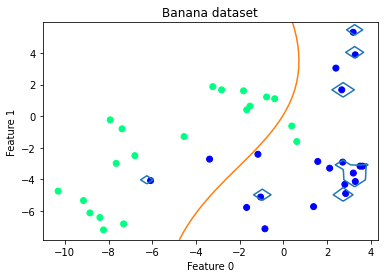

In [ ]:
#TODO

#POSSIBLE SOLUTION
import prtools as pr

a = pr.gendatb([20,20])

#train a svc with a rbf kernel with 0.1 kernel width
w1 = pr.svc(('rbf', 0.1,1))
w1.train(a)

#now for 10 kernel width
w2 = pr.svc(('rbf', 10,1))
w2.train(a)

#create a banana test set
b = pr.gendatb([20,20])

e1 = pr.testc(b, w1)  """Self Note: Wrong!!!!!!"""
e2 = pr.testc(b, w2)

print(e1)
print(e2)

#plot the data
pr.scatterd(a)
pr.plotc(w1)
pr.plotc(w2)
